In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

i = [1, 0, 0, 0]
j = [1, 0, 1, 0]
cosine_similarity([i, j])

array([[1.        , 0.70710678],
       [0.70710678, 1.        ]])

####  该函数的输入是一个矩阵/二维数组等等，Y可以为None，当Y为None时，代码实现里会将Y替换成X，而metric指明X和Y每对元素之间采用的距离公式

具体参考sklearn文档  https://scikit-learn.org/stable/modules/metrics.html#metrics

In [2]:
cosine_similarity(np.array(i).reshape(1,-1),np.array(j).reshape(1,-1))

array([[0.70710678]])

In [3]:
x = [[1, 0, 0, 0],
     [0,1,1,0]]
y = [[1, 0, 1, 0],
     [1,1,0,0]]

cosine_similarity(x,y)

array([[0.70710678, 0.70710678],
       [0.5       , 0.5       ]])

In [4]:
import numpy as np

def diy_cosine_similarity(x,y):
    if isinstance(x,list):
        x = np.array(x)
    if isinstance(y,list):
        y = np.array(y)
    num = np.matmul(x,y.T)
    denom1 = np.linalg.norm(x,axis=1,keepdims=True)
    denom2 = np.linalg.norm(y,axis=1,keepdims=True)
    denorm = np.matmul(denom1,denom2.T)
    return num / denorm
diy_cosine_similarity(x,y)

array([[0.70710678, 0.70710678],
       [0.5       , 0.5       ]])

In [5]:
from scipy.stats import pearsonr
from numpy import corrcoef
i = [1, 0, 0, 0]
j = [1, 0.5, 0.5, 0]
print(pearsonr(i, j))
print(corrcoef(i,j))

(0.816496580927726, 0.18350341907227397)
[[1.         0.81649658]
 [0.81649658 1.        ]]


假设x.shape = n_sample,len_feature 


np.corrcoef(x)生成一个n_sample*n_sample的对称矩阵，即相关系数矩阵


因此np.corrcoef(vec1, vec2)生成一个2*2矩阵

In [6]:
a = np.array(i)-0.25
b = np.array(j)-0.5
a = a.reshape(1,-1)
b = b.reshape(1,-1)

In [7]:
cosine_similarity(a,b)

array([[0.81649658]])

In [8]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=1000, n_features=3, n_informative=1, noise=100, random_state=9527)
 
# 分别计算每个特征与标签的相关系数
from scipy.stats import pearsonr
 
p1 = pearsonr(X[:,0],y)
p2 = pearsonr(X[:,1],y)
p3 = pearsonr(X[:,2],y)
 
print(p1)
print(p2)
print(p3)

(0.012936800506951266, 0.6828310401787084)
(0.6680920624164112, 2.834537616405789e-130)
(0.03938982451397197, 0.21330062660673496)


### UserCF算法

1.计算用户之间的相似度
2.计算用户对新物品的评分预测
3.对用户进行物品推荐

In [9]:
users = np.array([[5,3,4,4],[3,1,2,3],[4,3,4,3],[3,3,1,5],[1,5,5,2]])
sim1 = cosine_similarity(users)
sim2 = np.corrcoef(users)

### UserCF算法实验

In [10]:
import numpy as np
import pandas as pd


def loadData():
    users = {'Alice': {'A': 5, 'B': 3, 'C': 4, 'D': 4},
             'user1': {'A': 3, 'B': 1, 'C': 2, 'D': 3, 'E': 3},
             'user2': {'A': 4, 'B': 3, 'C': 4, 'D': 3, 'E': 5},
             'user3': {'A': 3, 'B': 3, 'C': 1, 'D': 5, 'E': 4},
             'user4': {'A': 1, 'B': 5, 'C': 5, 'D': 2, 'E': 1}
             }
    return users

字典users的键表示不同用户的名字，值为一个评分字典，评分字典的键值对表示某物品被当前用户的评分。
由于现实场景中，用户对物品的评分比较稀疏。如果直接使用矩阵进行存储，会存在大量空缺值，故此处使用了字典

In [11]:
user_data = loadData()
similarity_matrix = pd.DataFrame(
    np.identity(len(user_data)),
    index=user_data.keys(),
    columns=user_data.keys(),
)
similarity_matrix   #维护了一个DataFrame

,Alice,user1,user2,user3,user4
Alice,1.0,0.0,0.0,0.0,0.0
user1,0.0,1.0,0.0,0.0,0.0
user2,0.0,0.0,1.0,0.0,0.0
user3,0.0,0.0,0.0,1.0,0.0
user4,0.0,0.0,0.0,0.0,1.0


In [12]:
for u1, items1 in user_data.items():
    for u2, items2 in user_data.items():
        if u1 == u2:
            continue
        vec1, vec2 = [], []
        for item, rating1 in items1.items():
            rating2 = items2.get(item, -1)
            if rating2 == -1:
                continue
            #循环的方式去获得用户评分向量
            vec1.append(rating1)
            vec2.append(rating2)
        # 计算不同用户之间的皮尔逊相关系数
        similarity_matrix[u1][u2] = np.corrcoef(vec1, vec2)[1][0]  #np.corrcoef(vec1, vec2)[0][1]也可

print(similarity_matrix)

          Alice     user1     user2     user3     user4
Alice  1.000000  0.852803  0.707107  0.000000 -0.792118
user1  0.852803  1.000000  0.467707  0.489956 -0.900149
user2  0.707107  0.467707  1.000000 -0.161165 -0.466569
user3  0.000000  0.489956 -0.161165  1.000000 -0.641503
user4 -0.792118 -0.900149 -0.466569 -0.641503  1.000000


get()方法语法：

dict.get(key, default=None)

key -- 字典中要查找的键。

default -- 如果指定键的值不存在时，返回该默认值。

In [13]:
target_user = 'Alice'
num = 2
# 由于最相似的用户为自己，去除本身
x 
sim_users = similarity_matrix[target_user].sort_values(ascending=False)[1:num+1].index.tolist()

print(f'与用户{target_user}最相似的{num}个用户为：{sim_users}')

与用户Alice最相似的2个用户为：['user1', 'user2']


In [14]:
similarity_matrix[target_user].sort_values(ascending=False)[1:num+1].index

Index(['user1', 'user2'], dtype='object')

In [15]:
weighted_scores = 0.
corr_values_sum = 0.

target_item = 'E'
# 基于皮尔逊相关系数预测用户评分
for user in sim_users:
    corr_value = similarity_matrix[target_user][user]
    user_mean_rating = np.mean(list(user_data[user].values()))

    weighted_scores += corr_value * (user_data[user][target_item] - user_mean_rating)
    corr_values_sum += corr_value

target_user_mean_rating = np.mean(list(user_data[target_user].values()))
target_item_pred = target_user_mean_rating + weighted_scores / corr_values_sum
print(f'用户{target_user}对物品{target_item}的预测评分为：{target_item_pred}')


用户Alice对物品E的预测评分为：4.871979899370592


ItemCF算法实验

In [16]:
import numpy as np
import pandas as pd


def loadData():
    items = {'A': {'Alice': 5.0, 'user1': 3.0, 'user2': 4.0, 'user3': 3.0, 'user4': 1.0},
             'B': {'Alice': 3.0, 'user1': 1.0, 'user2': 3.0, 'user3': 3.0, 'user4': 5.0},
             'C': {'Alice': 4.0, 'user1': 2.0, 'user2': 4.0, 'user3': 1.0, 'user4': 5.0},
             'D': {'Alice': 4.0, 'user1': 3.0, 'user2': 3.0, 'user3': 5.0, 'user4': 2.0},
             'E': {'user1': 3.0, 'user2': 5.0, 'user3': 4.0, 'user4': 1.0}
             }
    return items


In [17]:
item_data = loadData()

similarity_matrix = pd.DataFrame(
    np.identity(len(item_data)),
    index=item_data.keys(),
    columns=item_data.keys(),
)

# 遍历每条物品-用户评分数据
for i1, users1 in item_data.items():
    for i2, users2 in item_data.items():
        if i1 == i2:
            continue
        vec1, vec2 = [], []
        for user, rating1 in users1.items():
            rating2 = users2.get(user, -1)
            if rating2 == -1:
                continue
            vec1.append(rating1)
            vec2.append(rating2)
        similarity_matrix[i1][i2] = np.corrcoef(vec1, vec2)[0][1]

print(similarity_matrix)

          A         B         C         D         E
A  1.000000 -0.476731 -0.123091  0.532181  0.969458
B -0.476731  1.000000  0.645497 -0.310087 -0.478091
C -0.123091  0.645497  1.000000 -0.720577 -0.427618
D  0.532181 -0.310087 -0.720577  1.000000  0.581675
E  0.969458 -0.478091 -0.427618  0.581675  1.000000


In [18]:
target_user = 'Alice'
target_item = 'E'
num = 2

sim_items = []
sim_items_list = similarity_matrix[target_item].sort_values(ascending=False).index.tolist()
for item in sim_items_list:
    # 如果target_user对物品item评分过
    if target_user in item_data[item]:
        sim_items.append(item)
    if len(sim_items) == num:
        break
print(f'与物品{target_item}最相似的{num}个物品为：{sim_items}')

与物品E最相似的2个物品为：['A', 'D']


In [19]:
target_user_mean_rating = np.mean(list(item_data[target_item].values()))
weighted_scores = 0.
corr_values_sum = 0.

target_item = 'E'
for item in sim_items:
    corr_value = similarity_matrix[target_item][item]
    user_mean_rating = np.mean(list(item_data[item].values()))

    weighted_scores += corr_value * (item_data[item][target_user] - user_mean_rating)
    corr_values_sum += corr_value

target_item_pred = target_user_mean_rating + weighted_scores / corr_values_sum
print(f'用户{target_user}对物品{target_item}的预测评分为：{target_item_pred}')

用户Alice对物品E的预测评分为：4.6


### 不同相似度比较

cosine相似度计算简单方便，一般较为常用。但是，当用户的评分数据存在 bias 时，效果往往不那么好。
简而言之，就是不同用户评分的偏向不同。部分用户可能乐于给予好评，而部分用户习惯给予差评或者乱评分。
这个时候，根据cosine 相似度计算出来的推荐结果效果会打折扣。

In [20]:
import numpy as np
import pandas as pd


def loadData():
    users = {'d': {'X': 4, 'Y': 4, 'Z': 5},
             'e': {'X': 1, 'Y': 1, 'Z': 2},
             'f': {'X': 4, 'Y': 1, 'Z': 5}
             }
    return users

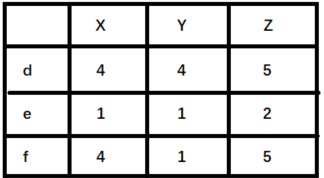

In [21]:
user_data = loadData()

similarity_matrix = pd.DataFrame(
    np.identity(len(user_data)),
    index=user_data.keys(),
    columns=user_data.keys(),
)

for u1, items1 in user_data.items():
    for u2, items2 in user_data.items():
        if u1 == u2:
            continue
        vec1, vec2 = [], []
        for item, rating1 in items1.items():
            rating2 = items2.get(item, -1)
            if rating2 == -1:
                continue
            #循环的方式去获得用户评分向量
            vec1.append(rating1)
            vec2.append(rating2)
        # 计算不同用户之间的皮尔逊相关系数
        similarity_matrix[u1][u2] = np.corrcoef(vec1, vec2)[1][0]  #np.corrcoef(vec1, vec2)[0][1]也可

print(similarity_matrix)

          d         e         f
d  1.000000  1.000000  0.693375
e  1.000000  1.000000  0.693375
f  0.693375  0.693375  1.000000


使用余弦相似度进行计算，用户 d 和 e 之间较为相似。但是实际上，用户 d 和 f 之间应该更加相似。只不过由于 d 倾向于打高分，e 倾向于打低分导致二者之间的余弦相似度更高。

### 矩阵分解算法

In [22]:
import random
import math


class BiasSVD():
    def __init__(self, rating_data, F=5, alpha=0.1, lmbda=0.1, max_iter=100):
        self.F = F          # 这个表示隐向量的维度
        self.P = dict()     # 用户矩阵P  大小是[users_num, F]
        self.Q = dict()     # 物品矩阵Q  大小是[item_nums, F]
        self.bu = dict()    # 用户偏置系数
        self.bi = dict()    # 物品偏置系数
        self.mu = 0         # 全局偏置系数
        self.alpha = alpha  # 学习率
        self.lmbda = lmbda  # 正则项系数
        self.max_iter = max_iter        # 最大迭代次数
        self.rating_data = rating_data  # 评分矩阵

        for user, items in self.rating_data.items():
            # 初始化矩阵P和Q, 随机数需要和1/sqrt(F)成正比
            self.P[user] = [random.random() / math.sqrt(self.F) for x in range(0, F)]
            self.bu[user] = 0
            for item, rating in items.items():
                if item not in self.Q:
                    self.Q[item] = [random.random() / math.sqrt(self.F) for x in range(0, F)]
                    self.bi[item] = 0

    # 采用随机梯度下降的方式训练模型参数
    def train(self):
        cnt, mu_sum = 0, 0
        for user, items in self.rating_data.items():
            for item, rui in items.items():
                mu_sum, cnt = mu_sum + rui, cnt + 1
        self.mu = mu_sum / cnt

        for step in range(self.max_iter):
            # 遍历所有的用户及历史交互物品
            for user, items in self.rating_data.items():
                # 遍历历史交互物品
                for item, rui in items.items():
                    rhat_ui = self.predict(user, item)  # 评分预测
                    e_ui = rui - rhat_ui                  # 评分预测偏差

                    # 参数更新
                    self.bu[user] += self.alpha * (e_ui - self.lmbda * self.bu[user])
                    self.bi[item] += self.alpha * (e_ui - self.lmbda * self.bi[item])
                    for k in range(0, self.F):
                        self.P[user][k] += self.alpha * (e_ui * self.Q[item][k] - self.lmbda * self.P[user][k])
                        self.Q[item][k] += self.alpha * (e_ui * self.P[user][k] - self.lmbda * self.Q[item][k])
            # 逐步降低学习率
            self.alpha *= 0.1


    # 评分预测
    def predict(self, user, item):
        return sum(self.P[user][f] * self.Q[item][f] for f in range(0, self.F)) + self.bu[user] + self.bi[
            item] + self.mu


# 通过字典初始化训练样本，分别表示不同用户（1-5）对不同物品（A-E)的真实评分
def loadData():
    rating_data={1: {'A': 5, 'B': 3, 'C': 4, 'D': 4},
           2: {'A': 3, 'B': 1, 'C': 2, 'D': 3, 'E': 3},
           3: {'A': 4, 'B': 3, 'C': 4, 'D': 3, 'E': 5},
           4: {'A': 3, 'B': 3, 'C': 1, 'D': 5, 'E': 4},
           5: {'A': 1, 'B': 5, 'C': 5, 'D': 2, 'E': 1}
          }
    return rating_data

# 加载数据
rating_data = loadData()
# 建立模型
basicsvd = BiasSVD(rating_data, F=10)
# 参数训练
basicsvd.train()
# 预测用户1对物品E的评分
for item in ['E']:
    print(item, basicsvd.predict(1, item))

# 预测结果：E 3.685084274454321

E 3.663042791749711


# Word2Vec

In [23]:
#Naive softmax 损失函数
def naiveSoftmaxLossAndGradient(
    centerWordVec,
    outsideWordIdx,
    outsideVectors,
    dataset
):
    """ Naive Softmax loss & gradient function for word2vec models

    Arguments:
    centerWordVec -- numpy ndarray, center word's embedding
                    in shape (word vector length, )
                    (v_c in the pdf handout)
    outsideWordIdx -- integer, the index of the outside word
                    (o of u_o in the pdf handout)
    outsideVectors -- outside vectors is
                    in shape (num words in vocab, word vector length) 
                    for all words in vocab (tranpose of U in the pdf handout)
    dataset -- needed for negative sampling, unused here.

    Return:
    loss -- naive softmax loss
    gradCenterVec -- the gradient with respect to the center word vector
                     in shape (word vector length, )
                     (dJ / dv_c in the pdf handout)
    gradOutsideVecs -- the gradient with respect to all the outside word vectors
                    in shape (num words in vocab, word vector length) 
                    (dJ / dU)
    """

    # centerWordVec:  (embedding_dim,1)
    # outsideVectors: (vocab_size,embedding_dim)

    scores = np.matmul(outsideVectors, centerWordVec)  # size=(vocab_size, 1)
    probs = softmax(scores)  # size=(vocab, 1)

    loss = -np.log(probs[outsideWordIdx])  # scalar

    dscores = probs.copy()  # size=(vocab, 1)
    dscores[outsideWordIdx] = dscores[outsideWordIdx] - 1  # dscores=y_hat - y
    gradCenterVec = np.matmul(outsideVectors, dscores)  # J关于vc的偏导数公式  size=(vocab_size, 1)
    gradOutsideVecs = np.outer(dscores, centerWordVec)  # J关于u的偏导数公式  size=(vocab_size, embedding_dim)

    return loss, gradCenterVec, gradOutsideVecs


In [24]:
#负采样损失函数
def negSamplingLossAndGradient(
    centerWordVec,
    outsideWordIdx,
    outsideVectors,
    dataset,
    K=10
):
  
    negSampleWordIndices = getNegativeSamples(outsideWordIdx, dataset, K)
    indices = [outsideWordIdx] + negSampleWordIndices

    gradCenterVec =np.zeros(centerWordVec.shape)  # (embedding_size,1)
    gradOutsideVecs = np.zeros(outsideVectors.shape)  # (vocab_size, embedding_size)
    loss = 0.0

    u_o = outsideVectors[outsideWordIdx]  # size=(embedding_size,1)
    z = sigmoid(np.dot(u_o, centerWordVec))  # size=(1, )
    loss -= np.log(z) # 损失函数的第一部分
    gradCenterVec += u_o * (z - 1)   # J关于vc的偏导数的第一部分
    gradOutsideVecs[outsideWordIdx] = centerWordVec * (z - 1)  # J关于u_o的偏导数计算

    for i in range(K):
        neg_id = indices[1 + i]
        u_k = outsideVectors[neg_id]
        z = sigmoid(-np.dot(u_k, centerWordVec))
        loss -= np.log(z)
        gradCenterVec += u_k * (1-z)
        gradOutsideVecs[neg_id] += centerWordVec * (1 - z)


    return loss, gradCenterVec, gradOutsideVecs

####  本采样通过只更新部分负样本词的embedding来加速计算过程，而naive softmax涉及整个词表的计算